In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


In [28]:
def plot_exons_junctions(data):
    # Extraindo dados
    exons = [list(map(int, exon.split('-'))) for exon in data['exons']]
    junctions = [list(map(int, junc.split('-'))) for junc in data['junction_coord']]
    strand = data['strand']
    extra_info = data['extra_info']

    # Ordenando exons pelo valor de início
    exons.sort(key=lambda x: x[0])
    
    # Configurando o gráfico
    fig, ax = plt.subplots(figsize=(30, 4), constrained_layout=True)
    y_pos = 1  # Posição vertical dos exons

    # Plotando exons como retângulos
    for exon in exons:
        start, end = exon
        rect = patches.Rectangle((start, y_pos), end - start, 0.2, 
                                 linewidth=1, edgecolor='blue', facecolor='blue', alpha=0.5)
        ax.add_patch(rect)
        ax.text(start, y_pos - 0.1, f'{start}', fontsize=8, ha='center', va='top')
        ax.text(end, y_pos - 0.1, f'{end}', fontsize=8, ha='center', va='top')

    # Plotando junções como arcos
    for junc in junctions:
        j_start, j_end = junc
        mid_point = (j_start + j_end) / 2
        theta = np.linspace(0, np.pi, 100)
        x_arc = mid_point + (j_end - j_start) / 2 * np.cos(theta)
        y_arc = y_pos + 0.5 * np.sin(theta)
        ax.plot(x_arc, y_arc, color='red')
        ax.text(j_start, y_pos + 0.6, f'{j_start}', fontsize=8, ha='center', va='bottom')
        ax.text(j_end, y_pos + 0.6, f'{j_end}', fontsize=8, ha='center', va='bottom')

    # Adicionando informações extras
    ax.text(0.05, 0.95, f'Strand: {strand}\n{extra_info}', transform=ax.transAxes, 
            fontsize=10, verticalalignment='top')

    # Configurando eixos
    ax.set_ylim(0, 2)
    ax.set_xlim(min([e[0] for e in exons]) - 10, max([e[1] for e in exons]) + 10)
    ax.set_yticks([])
    ax.set_xlabel('Genomic Coordinates')
    ax.set_title('Exon and Junction Visualization')
    plt.show()



{'exons': ['16945775-16945832', '16945909-16946266'], 'junction_coord': ['16945833-16945908', '16945828-16945909'], 'strand': '+', 'extra_info': 'e'}


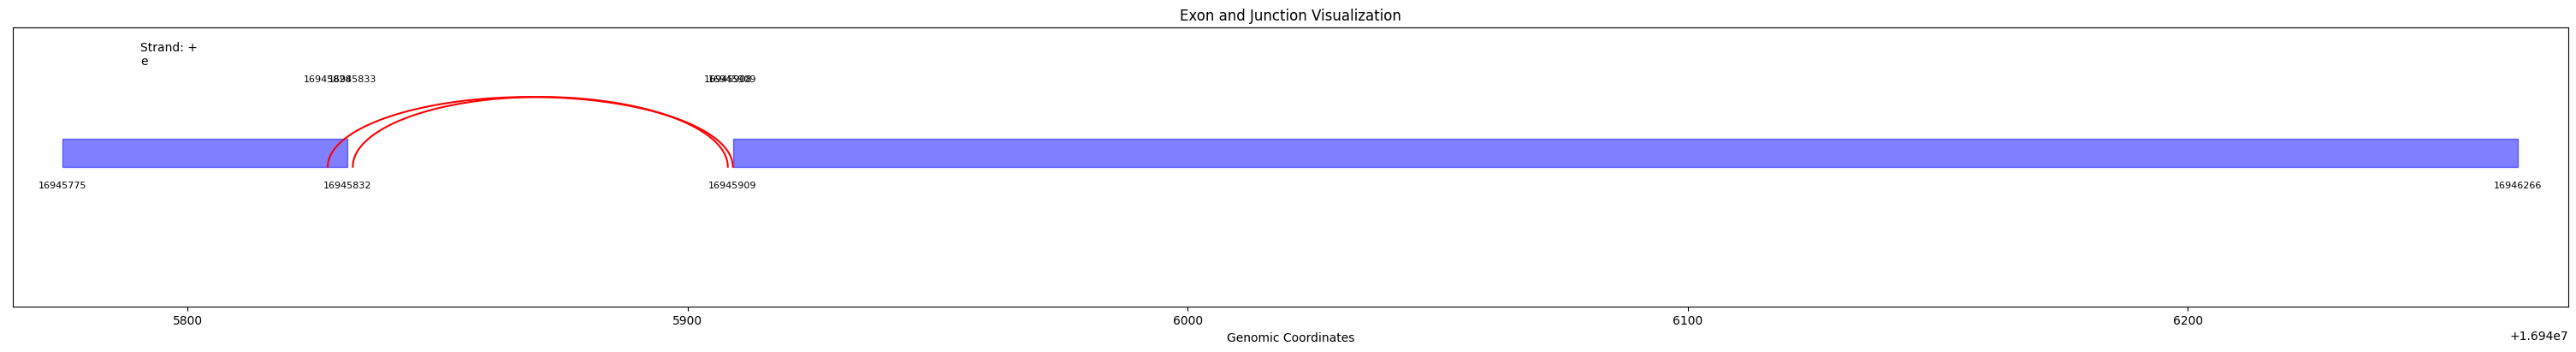

[{'exons': ['182253-182749', '182061-182135'], 'junction_coord': ['182136-182252', '182135-182253'], 'strand': '-', 'extra_info': 'e'}, {'exons': ['313567-313759', '313101-313452'], 'junction_coord': ['313453-313566', '313418-313567'], 'strand': '-', 'extra_info': 'e'}, {'exons': ['2460102-2460817', '2459571-2459870', '2459571-2459870'], 'junction_coord': ['2459871-2460101', '2456709-2460167', '2456856-2460314'], 'strand': '+', 'extra_info': 'e'}, {'exons': ['5258208-5258784', '5256870-5258137'], 'junction_coord': ['5258138-5258207', '5258137-5258208'], 'strand': '-', 'extra_info': 'e'}, {'exons': ['5448611-5449164', '5449204-5449212'], 'junction_coord': ['5449165-5449203', '5449116-5449213', '5449155-5449204', '5449164-5449213'], 'strand': '+', 'extra_info': 'e'}, {'exons': ['5449204-5449212', '5449213-5449308'], 'junction_coord': ['5449213-5449212', '5449212-5449357'], 'strand': '+', 'extra_info': 'e'}, {'exons': ['5449213-5449308', '5449204-5449212', '5449204-5449212'], 'junction_co

In [34]:
# Exemplo de uso
example_data = {
    "exons": ["5056537-5056646", "5055962-5056217"],
    "junction_coord": ["5056209-5056537", "5056217-5056551"],
    "strand": "-",
    "extra_info": "E2"
}

import pandas as pd
# Read the TSV file into a DataFrame
tsv_file = "/home/bia/LandscapeSplicingGrasses/SplicingLandscapeGrasses/merging_outputs/data/alternative_intron.tsv"  # Replace with your file path
df = pd.read_csv(tsv_file, sep="\t", comment="#")

# Group by lsv_id
grouped = df.groupby("lsv_id")

data = []
# Iterate over each group
for lsv_id, group in grouped:
    # Extract relevant information
    exons_ref = list(group["reference_exon_coord"].drop_duplicates())  # Use reference_exon_coord or spliced_with_coord
    exons_spl = list(group["spliced_with_coord"].drop_duplicates())
    exons = exons_ref + exons_spl
    junction_coord = list(group["junction_coord"].drop_duplicates())
    strand = group["strand"].iloc[0]  # Strand is the same for all rows in the group
    extra_info = lsv_id  # Use lsv_id as extra_info or add other info if needed

    # Prepare data for plotting
    plot_data = {
        "exons": exons,
        "junction_coord": junction_coord,
        "strand": strand,
        "extra_info": 'e'
    }

    if lsv_id == "AT4G35770.Araport11.447:s:16945775-16945832":
        print(plot_data)
        plot_exons_junctions(plot_data)

    data.append(plot_data)
print(data)




In [ ]:
def plot_exons_junctions(data):
    # Extracting data
    exons = [list(map(int, exon.split('-'))) for exon in data['exons']]
    junctions = [list(map(int, junc.split('-'))) for junc in data['junction_coord']]
    strand = data['strand']
    extra_info = data['extra_info']

    # Sorting exons by start position
    exons.sort(key=lambda x: x[0])
    
    # Configuring plot
    fig, ax = plt.subplots(figsize=(30, 4), constrained_layout=True)
    y_pos = 1  # Vertical position for exons
    fixed_exon_width = 20  # Fixed visual width for exons
    fixed_intron_width = 10  # Fixed visual width for introns

    # Calculate visual positions for exons and introns
    visual_positions = []
    current_x = 0  # Starting x-position for the first exon

    for i, (start, end) in enumerate(exons):
        # Exon visual position
        exon_visual_start = current_x
        exon_visual_end = current_x + fixed_exon_width
        visual_positions.append({
            'genomic_start': start,
            'genomic_end': end,
            'visual_start': exon_visual_start,
            'visual_end': exon_visual_end,
            'type': 'exon'
        })
        
        # Intron visual position (if not the last exon)
        if i < len(exons) - 1:
            next_exon_start = exons[i + 1][0]
            intron_visual_start = exon_visual_end
            intron_visual_end = intron_visual_start + fixed_intron_width
            visual_positions.append({
                'genomic_start': end,
                'genomic_end': next_exon_start,
                'visual_start': intron_visual_start,
                'visual_end': intron_visual_end,
                'type': 'intron'
            })
            current_x = intron_visual_end  # Update current_x for the next exon

    # Plotting exons and introns
    for segment in visual_positions:
        if segment['type'] == 'exon':
            # Draw fixed-width exon rectangle
            rect = patches.Rectangle((segment['visual_start'], y_pos), 
                                     fixed_exon_width, 0.2,
                                     linewidth=1, edgecolor='blue', facecolor='blue', alpha=0.5)
            ax.add_patch(rect)
            # Add actual genomic coordinates as text
            ax.text(segment['genomic_start'], y_pos - 0.1, f'{segment['genomic_start']}', fontsize=8, ha='center', va='top')
            ax.text(segment['genomic_end'], y_pos - 0.1, f'{segment['genomic_end']}', 
                    fontsize=8, ha='center', va='top')
        elif segment['type'] == 'intron':
            # Draw intron as a thin line
            ax.plot([segment['visual_start'], segment['visual_end']], [y_pos + 0.1, y_pos + 0.1], 
                    color='black', linewidth=1)

    # Function to map genomic coordinates to visual positions
    def map_coordinate(coord, visual_positions):
        for segment in visual_positions:
            if segment['genomic_start'] <= coord <= segment['genomic_end']:
                if segment['type'] == 'exon':
                    # Map to the middle of the exon
                    return segment['visual_start'] + (coord - segment['genomic_start']) / (segment['genomic_end'] - segment['genomic_start']) * fixed_exon_width
                elif segment['type'] == 'intron':
                    # Map to the middle of the intron
                    return segment['visual_start'] + (coord - segment['genomic_start']) / (segment['genomic_end'] - segment['genomic_start']) * fixed_intron_width
        return coord  # Return original if not in any segment

    # Plotting junctions as arcs
    for j_start, j_end in junctions:
        # Map coordinates to visual positions
        x_start = map_coordinate(j_start, visual_positions)
        x_end = map_coordinate(j_end, visual_positions)
        
        # Calculate arc parameters
        mid_point = (x_start + x_end) / 2
        radius = abs(x_end - x_start) / 2
        theta = np.linspace(0, np.pi, 100)
        x_arc = mid_point + radius * np.cos(theta)
        y_arc = y_pos + 0.5 * np.sin(theta)
        
        ax.plot(x_arc, y_arc, color='red')
        ax.text(j_start, y_pos + 0.6, f'{j_start}', fontsize=8, ha='center', va='bottom')
        ax.text(j_end, y_pos + 0.6, f'{j_end}', fontsize=8, ha='center', va='bottom')

    # Adding extra info
    ax.text(0.05, 0.95, f'Strand: {strand}\n{extra_info}', transform=ax.transAxes,
            fontsize=10, verticalalignment='top')

    # Setting axis limits
    all_visual_coords = [segment['visual_start'] for segment in visual_positions] + \
                        [segment['visual_end'] for segment in visual_positions]
    ax.set_xlim(min(all_visual_coords) - 10, max(all_visual_coords) + 10)
    ax.set_ylim(0, 2)
    ax.set_yticks([])
    ax.set_xlabel('Genomic Coordinates (Visual Representation)')
    ax.set_title('Exon and Junction Visualization with Fixed Exon and Intron Widths')
    plt.show()

SyntaxError: f-string: unmatched '[' (2521953295.py, line 56)

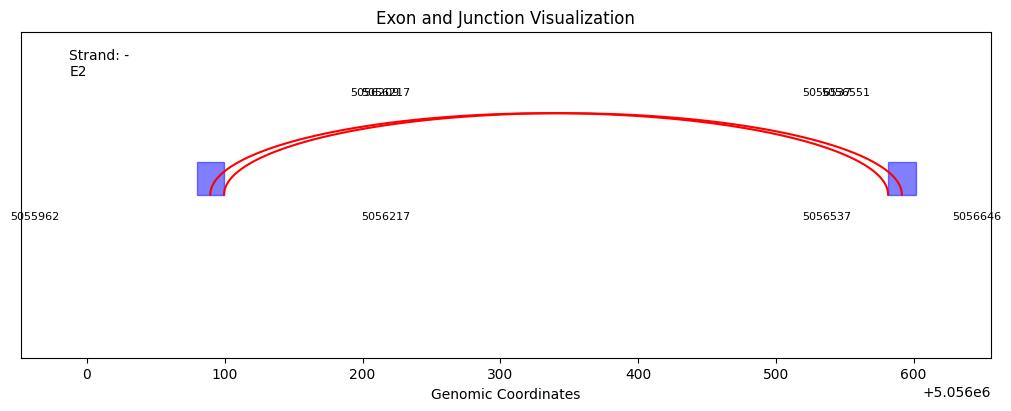

In [18]:
example_data = {
    "exons": ["5056537-5056646", "5055962-5056217"],
    "junction_coord": ["5056209-5056537", "5056217-5056551"],
    "strand": "-",
    "extra_info": "E2"
}

plot_exons_junctions(example_data)